# Primerjava datotečnih formatov velepodatkovnih zbirk

Velepodatkovne zbirke najdemo v različnih oblikah. Pri tem so se skozi čas ustalili določeni datotečni formati, ki se pogosto uporabljajo. Takšen datotečni format je na primer CSV *(ang. comma-separated values)*, ki je zelo razširjen na področju podatkovne znanosti. V tej enoti si bomo pogledali različne datotečne formate, ki jih lahko uporabljamo za shranjevanje in izmenjavo velepodatkov. Preizkusili bomo njihovo učinkovitost, velikost in hitrost branja/pisanja ter jih na podlagi tega med seboj primerjali v sklopu knjižnice Pandas.

## Ustvarjanje zbirke velepodatkov

Najprej si bomo pripravili lastno funkcijo za ustvarjanje poljubno velike zbirke velepodatkov. Ustvarili bomo velepodatke z opisi igralcev v ekipah. Igralec bo imel naslednje lastnosti:

* Položaj (levo, sredina, desno)
* Starost (vrednost med 18 in 50)
* Ekipa (rdeča, modra, rumena, zelena)
* Zmaga (da, ne)
* Verjetnost (vrednost med 0 in 1)

Z znanjem, ki ste ga pridobili v prejšnji enoti, bomo izvedli tudi optimizacijo podatkovnih tipov nad ustvarjeno zbirko velepodatkov.

In [ ]:
%pip install humanize --quiet

In [2]:
import pandas as pd
import numpy as np
import humanize
import os

def generate_data(size):
    df = pd.DataFrame()
    df['Polozaj'] = np.random.choice(['levo', 'sredina', 'desno'], size)
    df['Starost'] = np.random.randint(18, 50, size)
    df['Ekipa'] = np.random.choice(['rdeča', 'modra', 'rumena', 'zelena'], size)
    df['Zmaga'] = np.random.choice(['da', 'ne'], size)
    df['Verjetnost'] = np.random.uniform(0, 1, size)
    return df

def optimize_types(df):
    df['Polozaj'] = df['Polozaj'].astype('category')
    df['Ekipa'] = df['Ekipa'].astype('category')
    df['Starost'] = df['Starost'].astype('uint8')
    df['Verjetnost'] = df['Verjetnost'].astype('float32')
    df['Zmaga'].map({'da': True, 'ne': False})
    return df

def get_file_size(path):
    return humanize.naturalsize(os.path.getsize(path))

df = optimize_types(generate_data(10_000_000))

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 5 columns):
 #   Column      Dtype   
---  ------      -----   
 0   Polozaj     category
 1   Starost     uint8   
 2   Ekipa       category
 3   Zmaga       object  
 4   Verjetnost  float32 
dtypes: category(2), float32(1), object(1), uint8(1)
memory usage: 143.1+ MB


,Polozaj,Starost,Ekipa,Zmaga,Verjetnost
0,sredina,27,rdeča,ne,0.411357
1,levo,36,rdeča,ne,0.810849
2,sredina,28,rumena,ne,0.358713
3,desno,46,rdeča,ne,0.509294
4,levo,26,zelena,da,0.376968


## CSV (comma-separated values)

Ustvarjeno zbirko velepodatkov shranimo v format CSV in izmerimo čas shranjevanja, čas nalaganja in velikost datoteke.

In [3]:
# čas shranjevanja CSV
%timeit df.to_csv('dataset_csv.csv', index=False)

# čas branja CSV
%timeit df = pd.read_csv('dataset_csv.csv')

# velikost datoteke CSV
get_file_size('dataset_csv.csv')

7.65 s ± 26.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.57 s ± 20.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


'307.1 MB'

Zapišimo dobljene rezultate v tabelo in v slovar (dictionary), da bomo lažje izvedli primerjavo v nadaljevanju.

| **Format** | **Shranjevanje** | **Branje** | **Velikost** |
| ---------- | ---------------- | ---------- | ------------ |
| CSV | 7650ms | 2570ms | 307,1 MB |



In [14]:
measurements = {} 

measurements['csv'] = {
        'save': 7650,
        'read': 2570,
        'size_MB': 307.1
    }

## Pickle

Pickle je format v programskem jeziku Python, ki omogoča shranjevanje vsebine spremenljivk v binarno obliko. S tem lahko enostavno shranimo vrednosti razredov, seznamov ali drugih podatkovnih struktur programskega jezika Python. To se izkaže kot zelo uporabno za prenos podatkov in tudi velepodatkov. Ker so podatkovne strukture knjižnice Pandas prav tako objekti programskega jezika Python, jih lahko shranimo v format Pickle. Knjižnica Pandas ima za to tudi namenski funkciji ``.to_pickle()`` in ``.read_pickle()``, ki omogočata shranjevanje in branje v ta datotečni format. V nadaljevanju si poglejmo kako se to obnese.

In [5]:
# čas shranjevanja Pickle
%timeit df.to_pickle('dataset_pickle.pkl')

# čas branja Pickle
%timeit df = pd.read_pickle('dataset_pickle.pkl')

# velikost datoteke Pickle
get_file_size('dataset_pickle.pkl')

1.92 s ± 28.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
512 ms ± 18.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


'120.0 MB'

Zapišimo dobljene rezultate v tabelo in v slovar (dictionary), da bomo lažje izvedli primerjavo v nadaljevanju.

| **Format** | **Shranjevanje** | **Branje** | **Velikost** |
| ---------- | ---------------- | ---------- | ------------ |
| CSV | 7650ms | 2570ms | 307,1 MB |
| Pickle | 1920ms | 512ms | 120 MB |

Opazimo, da je hitrost shranjevanja in branja bistveno boljša, prav tako pa je velikost datoteke manjša. 



In [15]:
measurements['pickle'] = {
    'save': 1920,
    'read': 512,
    'size_MB': 120
}

## Parquet

Datotečni format Apache Parquet je odprtokodni format in je namenjen učinkovitemu delu z večjimi količinami podatkov. Podpira tudi kompresijo in je podprt v več programskih jezikih - tudi v Python-u. Parquet je datotečni format, ki se ponavadi uporablja za obdelavo, shranjevanje in prenos velepodatkov, saj je podoben drugim podobnim formatom kot sta RCFile in ORC (Apache Hadoop). Ta datotečni format je namenjen shranjevanju poljubnih podatkov, hkrati pa je njegova značilnost nizka poraba diskovnega pomnilnika. Knjižnica Pandas omogoča uporabo tega formata s funkcijama ``.to_parquet()`` in ``.read_parquet()``, vendar je pred uporabo potrebno namestiti podporno knjižnico `pyarrow`. Preizkusimo ta format in ga primerjajmo z ostalimi. 

In [ ]:
# namestimo podporno knjižnico pyarrow
%pip install pyarrow --quiet

In [8]:
# čas shranjevanja Parquet
%timeit df.to_parquet('dataset_parquet.parquet')

# čas branja Parquet
%timeit df = pd.read_parquet('dataset_parquet.parquet')

# velikost datoteke Parquet
get_file_size('dataset_parquet.parquet')

1.1 s ± 11.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
304 ms ± 14.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


'58.8 MB'

Zapišimo dobljene rezultate v tabelo in v slovar (dictionary), da bomo lažje izvedli primerjavo v nadaljevanju.

| **Format** | **Shranjevanje** | **Branje** | **Velikost** |
| ---------- | ---------------- | ---------- | ------------ |
| CSV | 7650ms | 2570ms | 307,1 MB |
| Pickle | 1920ms | 512ms | 120 MB |
| Parquet | 1100ms | 304ms | 58,8 MB |

Opazimo, da je hitrost shranjevanja in branja boljša od CSV in Pickle, prav tako pa je velikost datoteke manjša. 



In [16]:
measurements['parquet'] = {
    'save': 1100,
    'read': 304,
    'size_MB': 58.8
}

## Feather

Datotečni format Feather je še en format, ki je namenjen shranjevanju tabel formata Apache Arrow, ki se ponavadi uporabljajo za zaledne strukture v knjižnicah kot je Pandas. Tudi ta format se pogosto uporablja za obdelavo, shranjevanje in izmenjavo velepodatkov. Knjižnica Pandas za delo z datotečnim formatom Feather omogoča funkciji ``.to_feather()`` in ``.read_feather()``, obe pa podobno kot pri Parquet, potrebujeta podporno knjižnico ``pyarrow``. Preizkusimo še ta format z našo podatkovno zbirko.


In [10]:
# čas shranjevanja Feather
%timeit df.to_feather('dataset_feather.feather')

# čas branja Feather
%timeit df = pd.read_feather('dataset_feather.feather')

# velikost datoteke Feather
get_file_size('dataset_feather.feather')

352 ms ± 5.45 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
203 ms ± 8.89 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


'111.2 MB'

Zapišimo dobljene rezultate v tabelo in v slovar (dictionary), da bomo lažje izvedli primerjavo v nadaljevanju.

| **Format** | **Shranjevanje** | **Branje** | **Velikost** |
| ---------- | ---------------- | ---------- | ------------ |
| CSV | 7650ms | 2570ms | 307,1 MB |
| Pickle | 1920ms | 512ms | 120 MB |
| Parquet | 1100ms | 304ms | 58,8 MB |
| Feather | 352ms | 203ms | 111,2 MB |

Opazimo, da je hitrost shranjevanja in branja hitrejša od CSV, Pickle in Parquet, velikost datoteke pa je večja od Parquet. Vidimo torej, da so nekateri datotečni formati namenjeni hitremu shranjevanju in branju velepodatkov, nekateri pa hitrejši izmenjavi velepdoatkov.



In [17]:
measurements['feather'] = {
    'save': 352,
    'read': 203,
    'size_MB': 111.2
}

## Primerjava CSV, Pickle, Parquet in Feather

Z meritvami smo shranili povprečne čase shranjevanja, branja in velikosti naše ustvarjene velepodatkovne zbirke. Za boljšo predstavo izrišimo grafe in primerjajmo različne datotečne formate.

In [ ]:
%pip install matplotlib --quiet

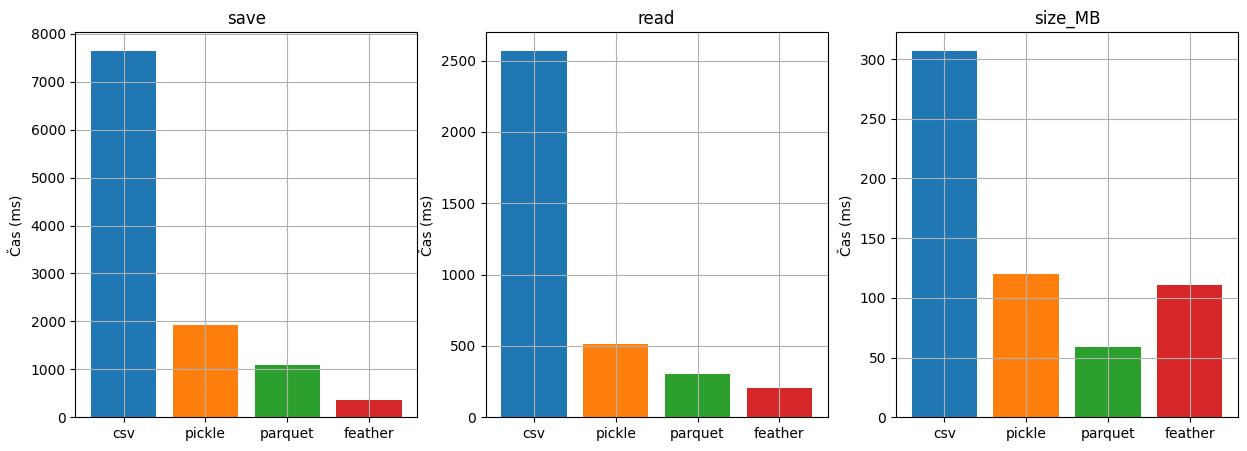

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

formats = measurements.keys()
measures = measurements['csv'].keys()

for i, measure in enumerate(measures):
    #ax[i].bar(formats, [measurements[format][i] for format in formats])
    ax[i].set_title(measure)
    ax[i].set_ylabel('Čas (ms)')
    ax[i].grid()

    for format in formats:
        ax[i].bar(format, measurements[format][measure], label=format)



## Drugi datotečni formati v Pandas

Knjižnica Pandas omogoča delo še z drugimi datotečnimi formati. Med te spadajo:

* [Microsoft Excel](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html#pandas.read_excel)
* [JSON](https://pandas.pydata.org/docs/reference/api/pandas.read_json.html#pandas.read_json)
* [HTML](https://pandas.pydata.org/docs/reference/api/pandas.read_html.html#pandas.read_html)
* [XML](https://pandas.pydata.org/docs/reference/api/pandas.read_xml.html#pandas.read_xml)
* [HDF5](https://pandas.pydata.org/docs/reference/api/pandas.read_hdf.html#pandas.read_hdf)
* [ORC](https://pandas.pydata.org/docs/reference/api/pandas.read_orc.html#pandas.read_orc)
* [SAS](https://pandas.pydata.org/docs/reference/api/pandas.read_sas.html#pandas.read_sas)
* [SPSS](https://pandas.pydata.org/docs/reference/api/pandas.read_spss.html#pandas.read_spss)
* [SQL](https://pandas.pydata.org/docs/reference/api/pandas.read_sql.html#pandas.read_sql)
* [Google BigQuery](https://pandas.pydata.org/docs/reference/api/pandas.read_gbq.html#pandas.read_gbq)
* [STATA](https://pandas.pydata.org/docs/reference/api/pandas.read_stata.html#pandas.read_stata)